In [31]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [32]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [ ]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
!unzip data.zip

In [34]:
train_dir = 'data/train'
test_dir = 'data/test'

## Question 1

In [35]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

- Answer for Question1: `binary_crossentropy`.

## Question 2

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

- Answer for Question2: 896

## Question 3

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.


In [40]:
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 918 images belonging to 2 classes.


In [41]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [42]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
184/184 [==============================] - 33s 176ms/step - loss: 0.6847 - acc: 0.5491 - val_loss: 0.6579 - val_acc: 0.6166
Epoch 2/10
184/184 [==============================] - 32s 177ms/step - loss: 0.6550 - acc: 0.5983 - val_loss: 0.6196 - val_acc: 0.6394
Epoch 3/10
184/184 [==============================] - 32s 176ms/step - loss: 0.6267 - acc: 0.6484 - val_loss: 0.6283 - val_acc: 0.5599
Epoch 4/10
184/184 [==============================] - 33s 177ms/step - loss: 0.5863 - acc: 0.6881 - val_loss: 0.5532 - val_acc: 0.7048
Epoch 5/10
184/184 [==============================] - 32s 176ms/step - loss: 0.5440 - acc: 0.7299 - val_loss: 0.5451 - val_acc: 0.7222
Epoch 6/10
184/184 [==============================] - 32s 174ms/step - loss: 0.5083 - acc: 0.7609 - val_loss: 0.5546 - val_acc: 0.7081
Epoch 7/10
184/184 [==============================] - 32s 174ms/step - loss: 0.4931 - acc: 0.7707 - val_loss: 0.5129 - val_acc: 0.7516
Epoch 8/10
184/184 [==============================] - 3

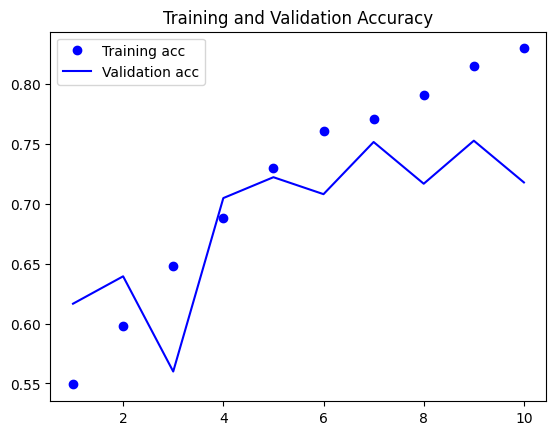

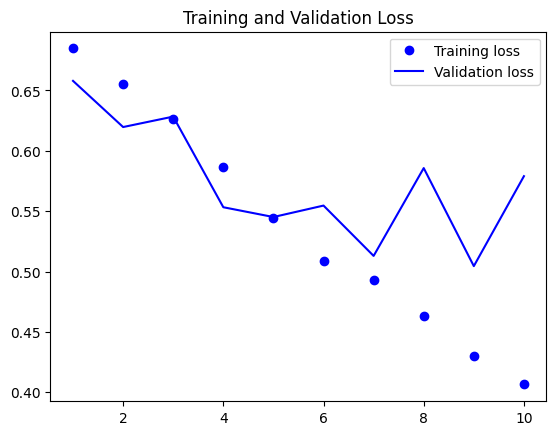

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [44]:
acc_median = np.median(acc)
acc_median

0.7454446852207184

- Answer for Question3: 0.8

## Question 4

In [45]:
loss_std = np.std(loss)
loss_std

0.09108764981572035

- Answer for Question4: 0.091

## Question 5

In [46]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

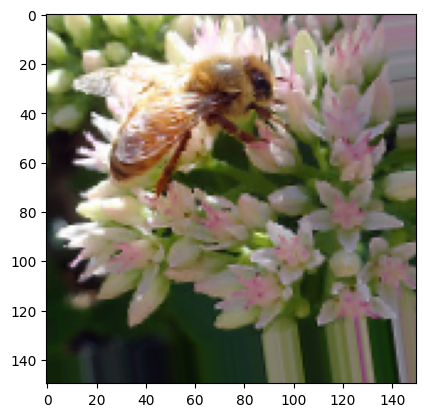

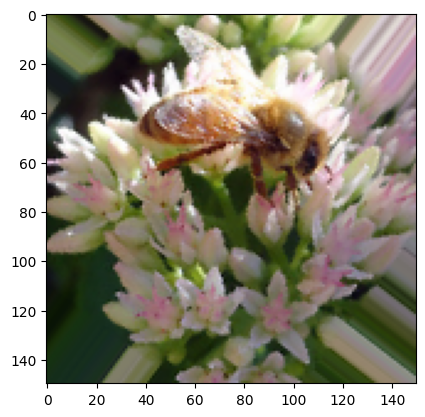

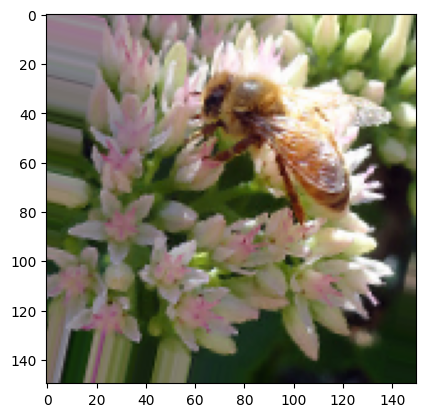

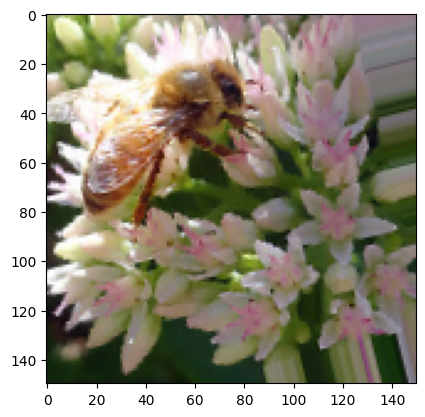

In [47]:
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [49]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.


In [51]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 918 images belonging to 2 classes.


In [52]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
184/184 [==============================] - 41s 222ms/step - loss: 0.4999 - acc: 0.7645 - val_loss: 0.4804 - val_acc: 0.7745
Epoch 2/10
184/184 [==============================] - 41s 223ms/step - loss: 0.4893 - acc: 0.7726 - val_loss: 0.4848 - val_acc: 0.7614
Epoch 3/10
184/184 [==============================] - 44s 239ms/step - loss: 0.4868 - acc: 0.7767 - val_loss: 0.4776 - val_acc: 0.7734
Epoch 4/10
184/184 [==============================] - 43s 231ms/step - loss: 0.4897 - acc: 0.7705 - val_loss: 0.5060 - val_acc: 0.7582
Epoch 5/10
184/184 [==============================] - 42s 227ms/step - loss: 0.4769 - acc: 0.7824 - val_loss: 0.4722 - val_acc: 0.7778
Epoch 6/10
184/184 [==============================] - 42s 227ms/step - loss: 0.4729 - acc: 0.7876 - val_loss: 0.4487 - val_acc: 0.8039
Epoch 7/10
184/184 [==============================] - 41s 225ms/step - loss: 0.4631 - acc: 0.7925 - val_loss: 0.4677 - val_acc: 0.7767
Epoch 8/10
184/184 [==============================] - 4

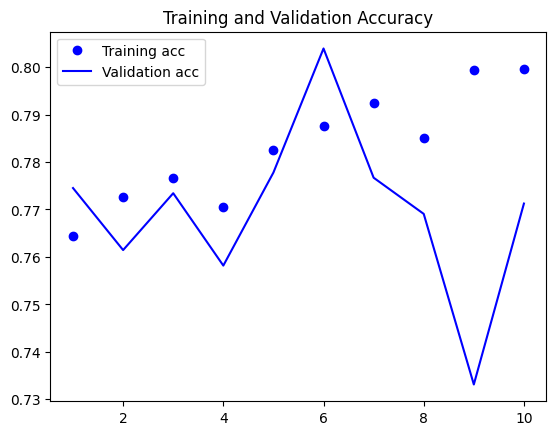

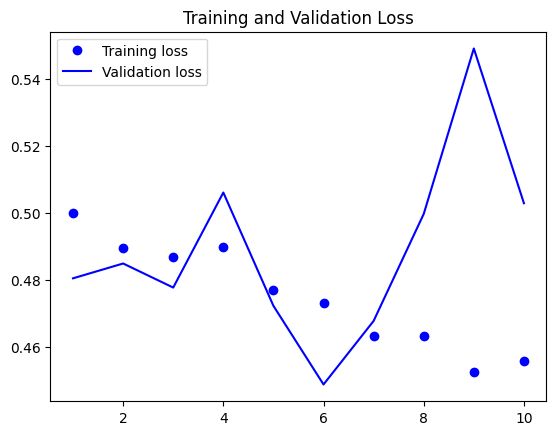

In [53]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [54]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.4888812839984894

- Answer for Question5: 0.48

In [55]:
val_acc_aug[5:10]

[0.8039215803146362,
 0.7766884565353394,
 0.7690631747245789,
 0.7331154942512512,
 0.7712418437004089]

In [56]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7708061099052429

Answer for Question6: 0.78